In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from case5_rk4 import rk_defect_control_static_alpha, rk_defect_control_perfect_first_step_smooth, rk_defect_control_perfect_first_step

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step_smooth(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_static_alpha(model, t_span, y0[0], tol, solution)
    # print("derivs", derivs)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    for this_x in xs:
        plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    plt.plot(t_eval, computed_solutions, label="rk6_interpolated")

    actual_solutions = solution(t_eval)
    plt.plot(t_eval, actual_solutions, label="solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title("solution vs rk6_interpolated")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # ====================================== figure of satisfying global defect
    actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    hb_prime_evals = [first_deriv(x) for x in t_eval]
    plt.figure()
    plt.plot(t_eval, actual_f_evals)
    plt.plot(t_eval, hb_prime_evals)
    plt.title(f"first derivative for tol={tol}")
    plt.show()

    defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    plt.figure()
    plt.plot(t_eval, defects)
    plt.title(f"global defect for tol={tol}")
    plt.show()
    
    # ====================================== end figure of satisfying global defect

    # ====================================== figure of defect shape

    minimum_step_size = 0.01
    defects_small_steps = []
    plt.figure()
    for (x_i_minus_1, x_i, x_i_plus_1, hb) in derivs:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        defects = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            f_eval  = model(pt, y)[0]
            hb_prime_eval = hb.prime(pt)
            defects.append( abs(hb_prime_eval - f_eval) )
        maximum_defect = max(defects)
        # minimum_defect = min(defects)
        # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
        plot_vals = [ defect/ maximum_defect for defect in defects]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (x_i_plus_1 - x_i < minimum_step_size):
            defects_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    plt.title("plot of defects")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    plt.figure()
    for [x_axis, plot_vals] in defects_small_steps:
        plt.plot(x_axis, plot_vals)
    plt.title("plot of defects on small step sizes")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    plt.show()

    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.49999999999999967]
n_steps 31
n_successful_steps 31

integration complete


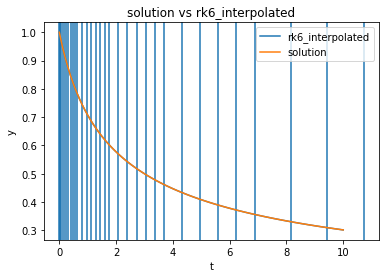

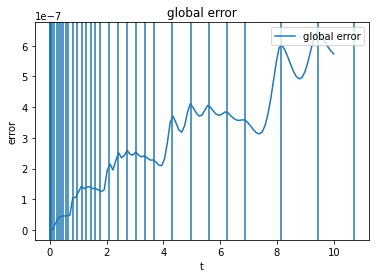

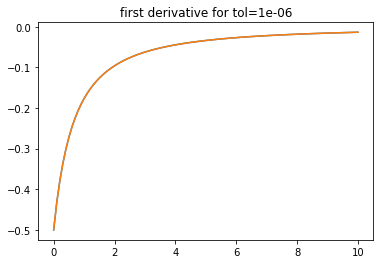

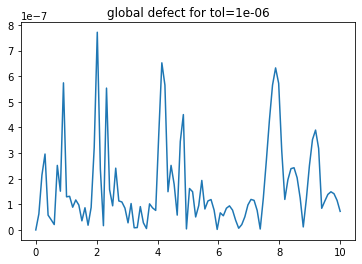

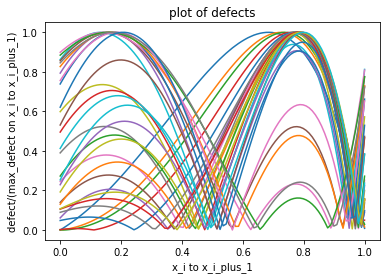

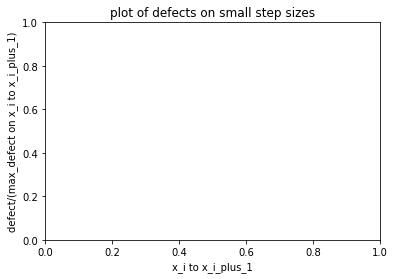

0.0
0.0
1.09934283898383e-12
3.3556046830085506e-11
9.217537844108392e-10
2.1971983565904907e-08
3.433742445935195e-08
4.13946896760109e-08
4.515230200841103e-08
4.6836305833686254e-08
4.7211439424543755e-08
4.6763248495729215e-08
1.0479341960856203e-07
1.3149629041198097e-07
1.4192796526923956e-07
1.4376523782555495e-07
1.4107344670222233e-07
1.3606678939126482e-07
1.2997402110137557e-07
2.2220726458854756e-07
2.546760990984609e-07
2.600641518801794e-07
2.531377512604571e-07
2.4087486083512744e-07
2.266636299763647e-07
3.7348708875617476e-07
4.1091464619835705e-07
4.056493225212954e-07
3.84122299745826e-07
3.5735795594904474e-07
6.042788383009423e-07
6.440317969480525e-07
6.163386293001061e-07


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.9999999999999987, 0.5000000000000007, 1.9999999999999973]
n_steps 84
n_successful_steps 75

integration complete


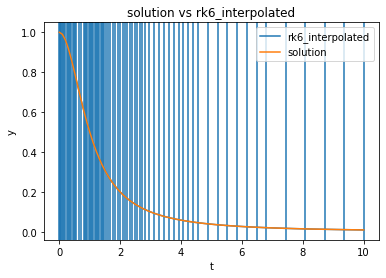

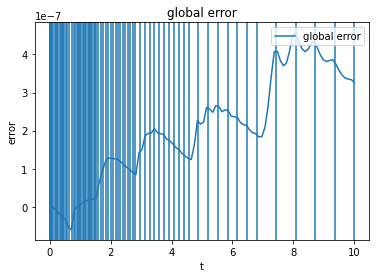

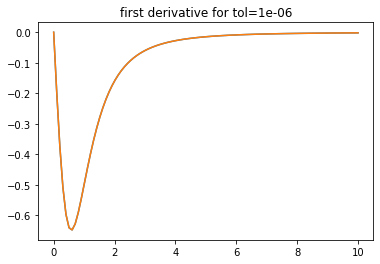

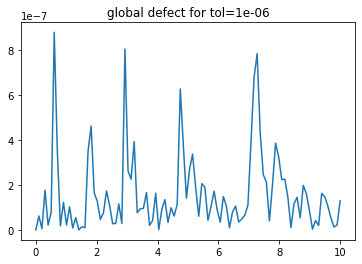

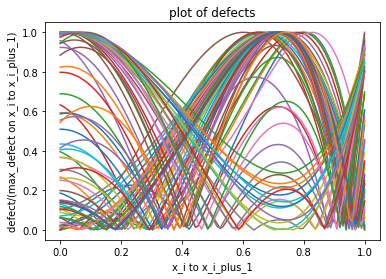

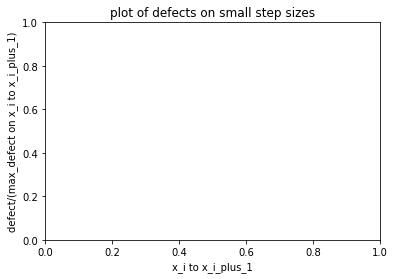

0.0
0.0
2.5845992013273644e-13
1.6821655179910522e-11
1.0821973317476363e-09
3.0011573226573773e-09
5.683633230724183e-09
8.98930707649015e-09
1.2733107790374731e-08
1.6696161453388925e-08
2.064165682824637e-08
2.4333779102825304e-08
2.755701433709845e-08
3.013299809673242e-08
3.193264286327491e-08
3.2882289335844916e-08
3.2963768492599854e-08
7.137784008293124e-08
5.7382837370667517e-08
6.8514675044539786e-09
4.243034479323171e-09
1.5251661045212472e-09
1.2074460320476987e-09
3.876590826124016e-09
6.420595721756683e-09
8.793418437846867e-09
1.0963108643124997e-08
1.2909925517501364e-08
1.4624332023149833e-08
1.6105022482282294e-08
1.735708848871198e-08
1.8390385214672733e-08
1.9218125257847163e-08
1.9855705857274586e-08
2.0319757598752375e-08
2.0627394570205126e-08
2.0795642319271224e-08
2.0841015357930814e-08
6.165335303398578e-08
9.035778730792643e-08
1.0965158114828455e-07
1.2174065583403504e-07
1.2839526911112564e-07
1.31014807225327e-07
1.306917701837662e-07
1.2826990972159003e-0

In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.9999999999999987, 0.5000000000000007]
n_steps 37
n_successful_steps 32

integration complete


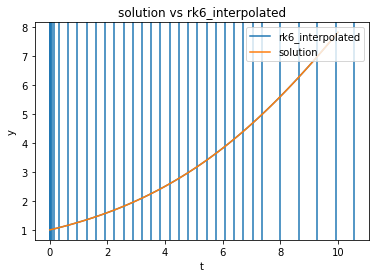

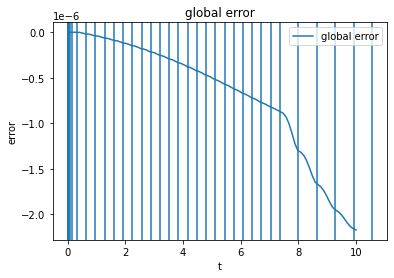

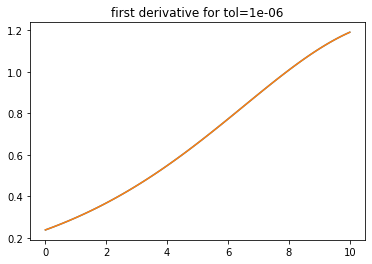

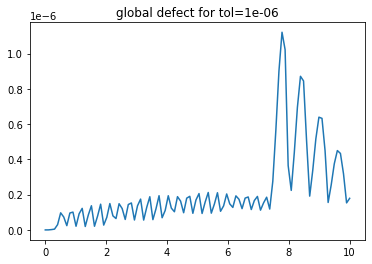

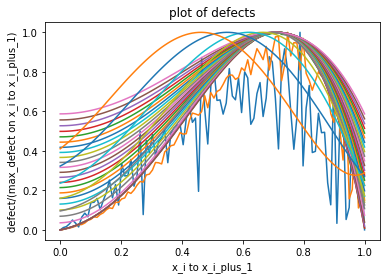

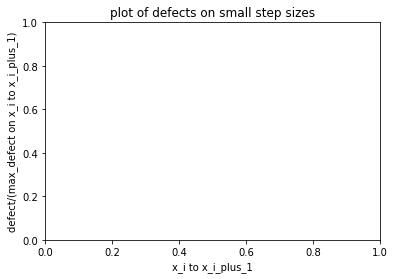

0.0
0.0
4.440892098500626e-16
1.7985612998927536e-14
5.788702850395566e-13
1.86204385244082e-11
6.023019860634804e-10
1.967264728897078e-08
4.088254956791104e-08
6.431715826593631e-08
9.004733136919185e-08
1.1812651612430614e-07
1.48587535830913e-07
1.8143936220127443e-07
2.1666397564956696e-07
2.5421343075038294e-07
2.940072567625407e-07
3.3593033954559814e-07
3.7983141742969906e-07
4.2552234358339547e-07
4.727782232372135e-07
5.213385341207299e-07
5.70909278518883e-07
6.211661900401566e-07
6.717589378091304e-07
7.22316236156928e-07
7.724516830620587e-07
8.217701346069362e-07
8.698743387824948e-07
1.3027798715370409e-06
1.6655769226048278e-06
1.951092084340189e-06
2.1584959268849957e-06
2.292408568749238e-06


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
alpha values [0.5000000000000007, 1.0, 2.0000000000000004, 3.999999999999999, 0.9999999999999987, 1.0000000000000029, 0.9999999999999972, 0.5, 8.000000000000004, 2.0, 1.000000000000011, 1.0000000000000444, 1.9999999999996447, 1.0000000000003553, 2.0000000000007105, 15.999999999999986, 0.9999999999999556, 1.0000000000000222, 0.5000000000000888, 0.9999999999999889, 0.9999999999998224, 0.49999999999982236]
n_steps 4101
n_successful_steps 3893

integration complete


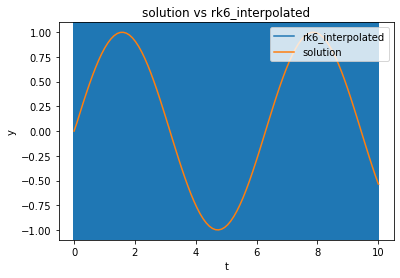

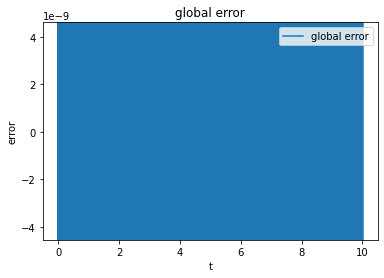

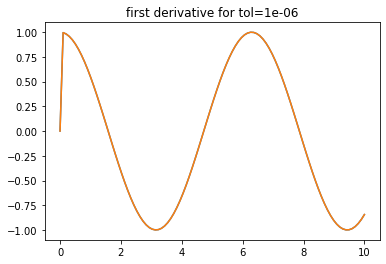

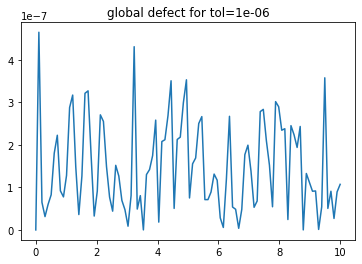

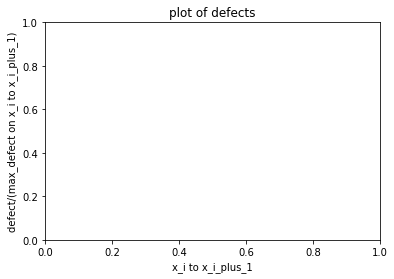

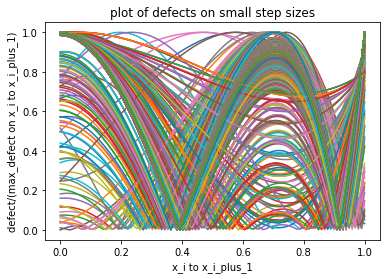

0.0
0.0
2.8930299995899578e-11
5.435442027024173e-11
7.659099656581736e-11
9.59329152575017e-11
1.1264928052867607e-10
7.696849225677371e-10
1.2707113356338895e-09
1.6433162261519918e-09
1.9107580326999107e-09
2.0926024333484117e-09
2.2052690420298893e-09
2.2625005965948297e-09
2.2757653504734687e-09
2.2546018298846837e-09
2.2069140091784956e-09
2.1392237252448876e-09
2.0568863695613615e-09
1.964274947557909e-09
1.8649370173151603e-09
1.7617283187831845e-09
1.656926283677418e-09
1.5523266595762752e-09
1.4493251217218006e-09
1.3489865821614266e-09
1.2521036291124332e-09
1.159245806986453e-09
1.0708011248528049e-09
9.87010806419164e-10
1.927002203638839e-09
2.3947288874115458e-09
2.5526755084714914e-09
2.514551719623448e-09
2.3589199274476336e-09
2.1391804716497376e-09
1.8908593441002708e-09
1.6369028285612153e-09
1.3915044949630584e-09
1.162854604275232e-09
2.1579156794793164e-09
1.454001141709682e-09
1.8264306733684066e-10
1.1519097897760844e-09
2.3542824495459413e-09
3.373001239426187

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-06
alpha values [0.9999999999999997, 1.0, 0.9999999999999987, 1.0000000000000002, 1.0000000000000007, 0.5000000000000007, 1.9999999999999973, 2.0, 0.5, 1.000000000000011, 2.0000000000000444, 1.9999999999996447, 2.0000000000007105, 1.0000000000000222, 0.5000000000000888, 0.9999999999999889, 0.4999999999999889, 0.9999999999998224, 0.49999999999982236]
n_steps 1391
n_successful_steps 1290

integration complete


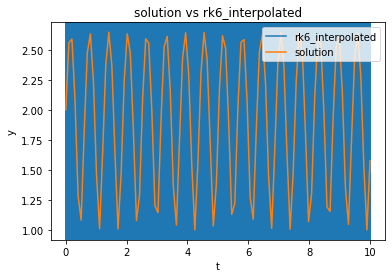

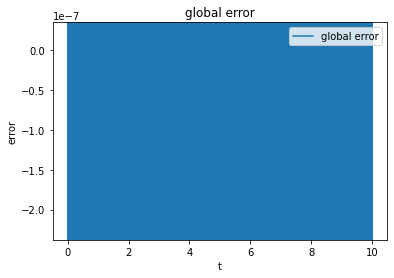

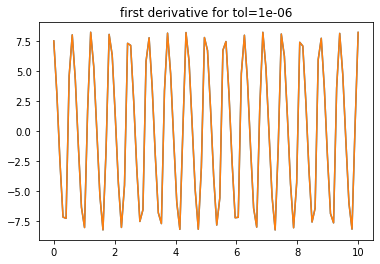

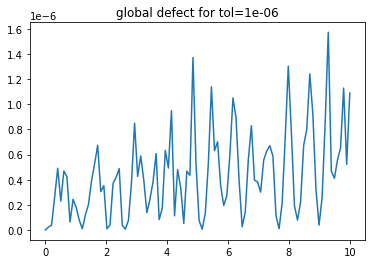

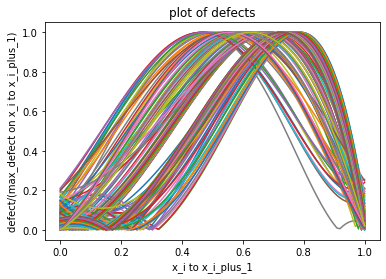

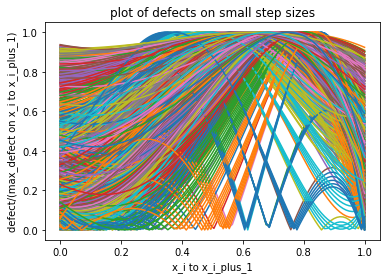

0.0
0.0
2.709524604682656e-09
5.3979771763579265e-09
8.024988673582811e-09
1.0552212437175967e-08
1.2945410521325584e-08
1.5175084300267372e-08
1.7216402525832564e-08
1.9048814525746138e-08
2.0655566146388082e-08
2.2023209034216507e-08
2.314116809287725e-08
2.400137733005181e-08
2.4597987646757247e-08
2.492715189816863e-08
2.2166219526553732e-08
2.1678094430654937e-08
2.091944306670257e-08
1.9895347591614154e-08
1.8612910768212032e-08
1.7081495329307472e-08
1.5313038836950454e-08
1.3322438707774609e-08
1.1128006516258893e-08
8.751951607877118e-09
6.220839399162514e-09
3.5658862529430735e-09
8.228160375267635e-10
1.969208351937368e-09
4.7704982186758116e-09
7.547251490436224e-09
1.02843509264261e-08
1.3009577637390635e-08
1.5837627209691618e-08
1.9047338373212597e-08
2.321175474051529e-08
2.940493715186676e-08
3.0462402156317125e-08
3.1635701835952545e-08
3.2949913908453254e-08
3.4434828766194414e-08
3.612460064417178e-08
3.8056453766088794e-08
4.026794075961959e-08
4.279219534275569e-0

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.49999999999999967]
n_steps 30
n_successful_steps 30

integration complete


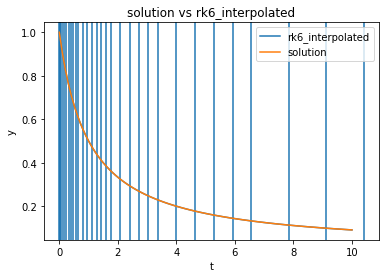

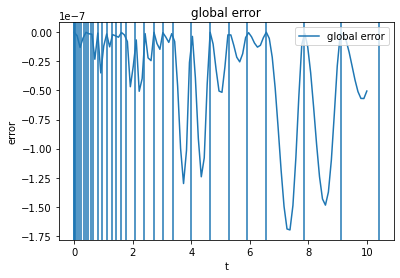

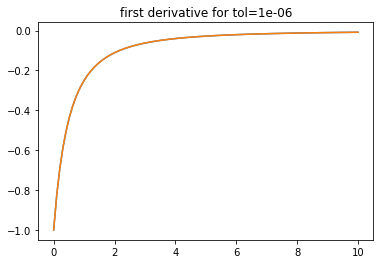

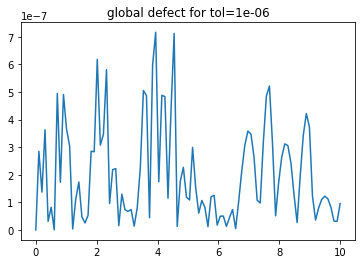

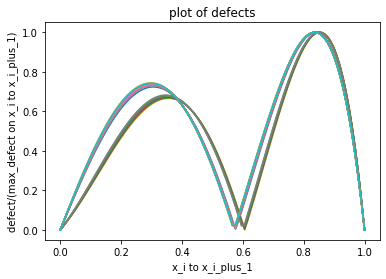

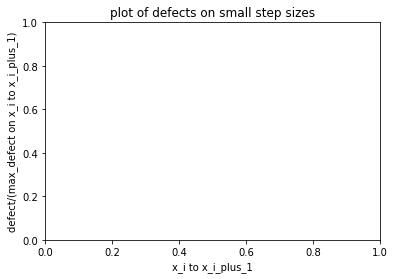

0.0
0.0
0.0
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.551115123125783e-17
5.551115123125783e-17
0.0
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
6.938893903907228e-17
6.938893903907228e-17
6.938893903907228e-17


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.9999999999999987, 0.5000000000000007, 1.9999999999999973, 2.0, 1.0000000000000056, 0.9999999999999944]
n_steps 70
n_successful_steps 62

integration complete


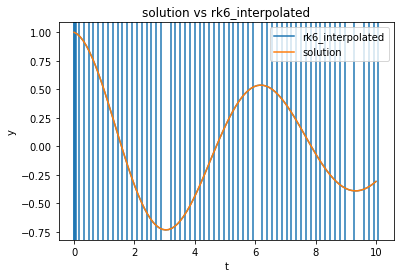

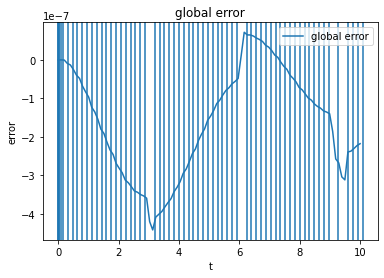

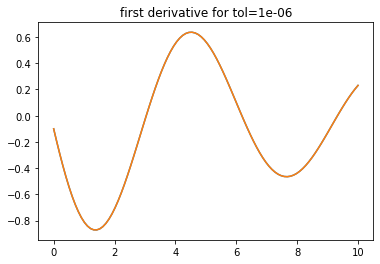

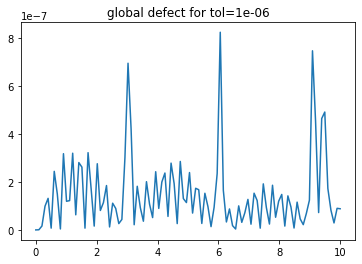

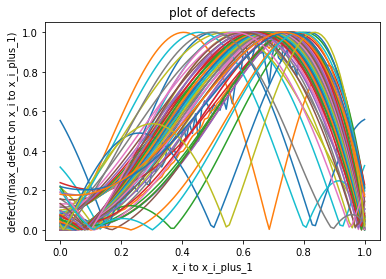

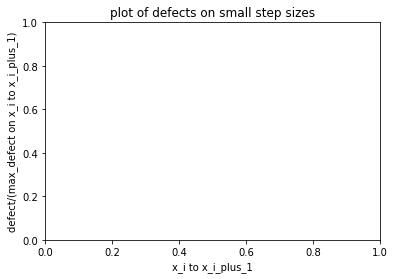

0.0
0.0
1.6653345369377348e-15
7.149836278586008e-14
3.410161042438631e-12
1.7947121566663782e-10
1.0073026968093757e-08
2.5161030370313142e-08
4.480532234119039e-08
6.827360021777196e-08
9.476095441662835e-08
1.2341257049630627e-07
1.5334698399982472e-07
1.8367927974438647e-07
2.1354364866665865e-07
2.421147491660225e-07
2.686273690155616e-07
2.923939408927545e-07
3.1281953566386633e-07
3.2941403160791083e-07
3.4180123875682256e-07
3.4972484352913114e-07
3.5305112311423414e-07
4.082363068702577e-07
3.971804822811009e-07
3.821792698976978e-07
3.636459044997764e-07
3.420717541446905e-07
3.180113590794953e-07
2.9206633916922797e-07
2.648686119322008e-07
2.370633711556991e-07
2.0929226396404488e-07
1.821771887858259e-07
1.56305104997978e-07
1.3221420844256038e-07
1.103817812153629e-07
9.121397059885794e-08
7.503769700045737e-08
6.209482827923551e-08
5.2538697947746016e-08
6.455801793148197e-08
6.220318060634611e-08
5.674936914834561e-08
4.845795942287623e-08
3.765374623210249e-08
2.471470

In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.49999999999999983, 1.0000000000000002, 0.9999999999999997, 0.5000000000000002, 1.0000000000000007, 0.49999999999999967, 0.9999999999999987, 1.0000000000000029, 0.5000000000000007, 0.9999999999999972]
n_steps 99
n_successful_steps 83

integration complete


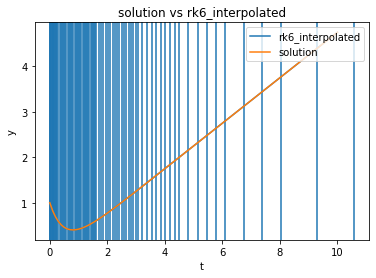

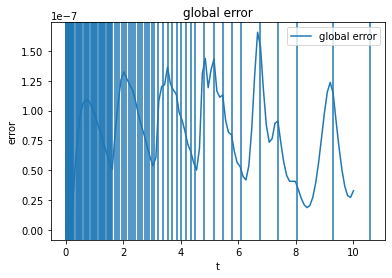

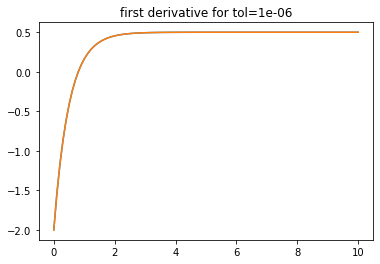

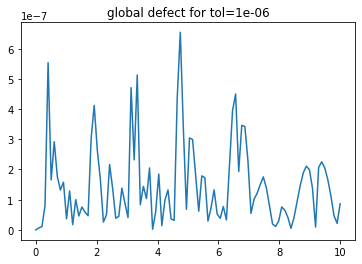

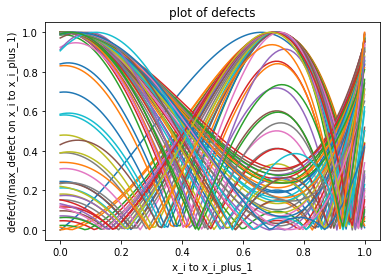

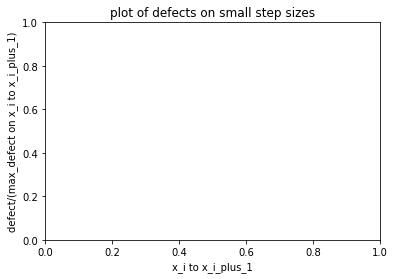

0.0
0.0
3.2564728691397704e-11
1.049336506575571e-09
1.9863217737281502e-09
2.848214220030343e-09
3.639462287097217e-09
4.36428082561946e-09
5.0266627527051355e-09
5.630389821043025e-09
6.179043832155173e-09
6.6760149630695764e-09
7.1245130905950305e-09
2.8270073060276957e-08
4.612202397780152e-08
6.106182204312915e-08
7.343173624718702e-08
8.353862029908399e-08
9.165733433347256e-08
9.803385120354946e-08
1.0288807317238025e-07
1.0641638736874626e-07
1.0879398121277362e-07
1.1017694162562819e-07
1.1070415650848986e-07
1.1049903669846373e-07
1.0967107494375128e-07
1.0831725638649203e-07
1.0652333481964149e-07
1.0436498615318257e-07
1.0190885146865725e-07
9.921347865482488e-08
9.6330173171566e-08
9.330376554705921e-08
9.017330365734821e-08
8.697267700474853e-08
8.373117915683181e-08
8.047401395261389e-08
7.722275130461753e-08
7.399573698219086e-08
7.08084609835069e-08
6.767388793793572e-08
6.460275403519233e-08
6.160383347886267e-08
5.8684175852086184e-08
5.584931983548813e-08
5.31034843

In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)